<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9.5: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [1]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

pytest                             6.2.3
python-dateutil                    2.8.1
python-jsonrpc-server              0.4.0
python-language-server             0.36.2
pytz                               2021.1
PyWavelets                         1.1.1
pywin32                            227
pywin32-ctypes                     0.2.0
pywinpty                           0.5.7
PyYAML                             5.4.1
pyzmq                              20.0.0
QDarkStyle                         2.8.1
QtAwesome                          1.0.2
qtconsole                          5.0.3
QtPy                               1.9.0
regex                              2021.4.4
requests                           2.25.1
requests-oauthlib                  1.3.0
rope                               0.18.0
rsa                                4.7.2
Rtree                              0.9.7
ruamel-yaml-conda                  0.15.100
scikit-image                       0.18.1
scikit-learn                       0.24.1
scipy

In [5]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re

# conda install -c conda-forge spacy
# python -m spacy download en_core_web_sm
import spacy

#pip install nltk

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [3]:
nltk.download('words')
#nltk.download('maxent_ne_chunker')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#nltk.download('stopwords')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\YC\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [12]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\YC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\YC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\YC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Load data

In [4]:
## Loading the data

input_file = '..\\DATA\\ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [5]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

In [70]:
text

'USS Enterprise (NCC-1701-D)\n\n"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."\n\nThe USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.\n\n==History==\n===Construction and launch===\nThe Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise\'s warp propulsion system design. Some of the Enterprise\'s components were derived from technology originally developed on the USS Pegasus.\n\nOne of the ship\'s na

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [ ]:
# ANSWER


In [6]:
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', '', tweet)  # remove hashtags
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[!"#\$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', tweet)  # remove punctuations
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    tweet = re.sub('\s+$', '', tweet)  # remove extra whitespace
    return tweet

In [7]:
clean_text = clean_tweet(text)

In [8]:
print(clean_text[:3000])

USS Enterprise NCC1701D For five hundred years every ship that has borne the name of the Enterprise has become a legend This one is no different The USS Enterprise NCC1701D was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet and the fifth Federation ship to bear the name Enterprise During her career the Enterprise served as the Federation flagship The Enterprise was destroyed during the Battle of Veridian III in 2371 History Construction and launch The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system The construction was a massive undertaking involving thousands of people across disciplines Construction was supervised by Commander Orfil Quinteros Dr Leah Brahms was responsible for much of the Enterprises warp propulsion system design Some of the Enterprises components were derived from technology originally developed on the USS Pegasus One of the ships nacelle tube was the site of a multiple murdersuicide whil

## Helper method

In [9]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

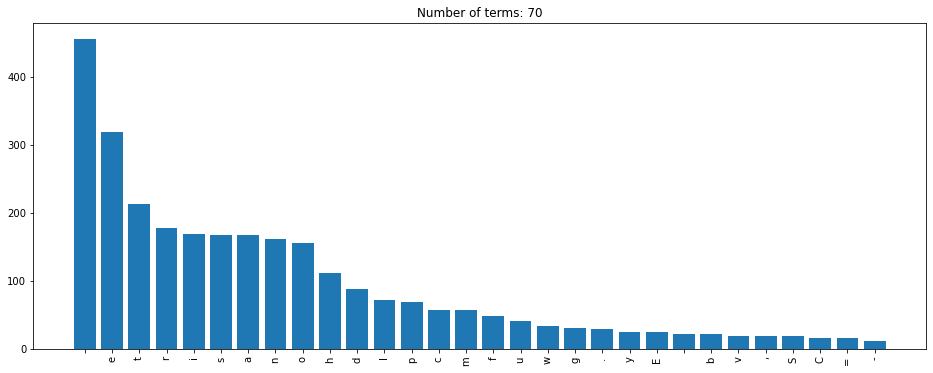

In [15]:
plot_words(text)

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [16]:
# load spaCy and the English model
nlp = spacy.load("en_core_web_sm")

# process the text
doc = nlp(text)

## Tokenise

In [17]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    #if t.text == '.': #remove this to see all, else if . will stop
       # break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| '\n\n'
 9| '"'
10| 'For'
11| 'five'
12| 'hundred'
13| 'years'
14| ','
15| 'every'
16| 'ship'
17| 'that'
18| 'has'
19| 'borne'
20| 'the'
21| 'name'
22| 'of'
23| 'the'
24| 'Enterprise'
25| 'has'
26| 'become'
27| 'a'
28| 'legend'
29| '.'
30| 'This'
31| 'one'
32| 'is'
33| 'no'
34| 'different'
35| '.'
36| '"'
37| '\n\n'
38| 'The'
39| 'USS'
40| 'Enterprise'
41| '('
42| 'NCC-1701'
43| '-'
44| 'D'
45| ')'
46| 'was'
47| 'a'
48| '24th'
49| 'century'
50| 'United'
51| 'Federation'
52| 'of'
53| 'Planets'
54| 'Galaxy'
55| 'Class'
56| 'starship'
57| 'operated'
58| 'by'
59| 'Starfleet'
60| ','
61| 'and'
62| 'the'
63| 'fifth'
64| 'Federation'
65| 'ship'
66| 'to'
67| 'bear'
68| 'the'
69| 'name'
70| 'Enterprise'
71| '.'
72| 'During'
73| 'her'
74| 'career'
75| ','
76| 'the'
77| 'Enterprise'
78| 'served'
79| 'as'
80| 'the'
81| 'Federation'
82| 'flagship'
83| '.'
84| 'The'
85| 'Enterprise'
86| 'was'
87| 'destroyed'
88| 'during'
89

In [18]:
# ANSWER - Visualise the tokenised words

for d in doc:
    print(d)

USS
Enterprise
(
NCC-1701
-
D
)



"
For
five
hundred
years
,
every
ship
that
has
borne
the
name
of
the
Enterprise
has
become
a
legend
.
This
one
is
no
different
.
"



The
USS
Enterprise
(
NCC-1701
-
D
)
was
a
24th
century
United
Federation
of
Planets
Galaxy
Class
starship
operated
by
Starfleet
,
and
the
fifth
Federation
ship
to
bear
the
name
Enterprise
.
During
her
career
,
the
Enterprise
served
as
the
Federation
flagship
.
The
Enterprise
was
destroyed
during
the
Battle
of
Veridian
III
in
2371
.



=
=
History==


=
=
=
Construction
and
launch===


The
Enterprise
was
built
at
Utopia
Planitia
Fleet
Yards
orbiting
Mars
in
the
Solar
system
.
The
construction
was
a
massive
undertaking
,
involving
thousands
of
people
across
disciplines
.
Construction
was
supervised
by
Commander
Orfil
Quinteros
.
Dr.
Leah
Brahms
was
responsible
for
much
of
the
Enterprise
's
warp
propulsion
system
design
.
Some
of
the
Enterprise
's
components
were
derived
from
technology
originally
developed
on
the
USS
Pega

### Stop Words

In [19]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    #if t.text == '.':
     #   break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| '\n\n'          '\n\n'
 9| '"'             '"'
10| 'For'           ''
11| 'five'          ''
12| 'hundred'       ''
13| 'years'         'years'
14| ','             ','
15| 'every'         ''
16| 'ship'          'ship'
17| 'that'          ''
18| 'has'           ''
19| 'borne'         'borne'
20| 'the'           ''
21| 'name'          ''
22| 'of'            ''
23| 'the'           ''
24| 'Enterprise'    'Enterprise'
25| 'has'           ''
26| 'become'        ''
27| 'a'             ''
28| 'legend'        'legend'
29| '.'             '.'
30| 'This'          ''
31| 'one'           ''
32| 'is'            ''
33| 'no'            ''
34| 'different'     'different'
35| '.'             '.'
36| '"'             '"'
37| '\n\n'          '\n\n'
38| 'The'  

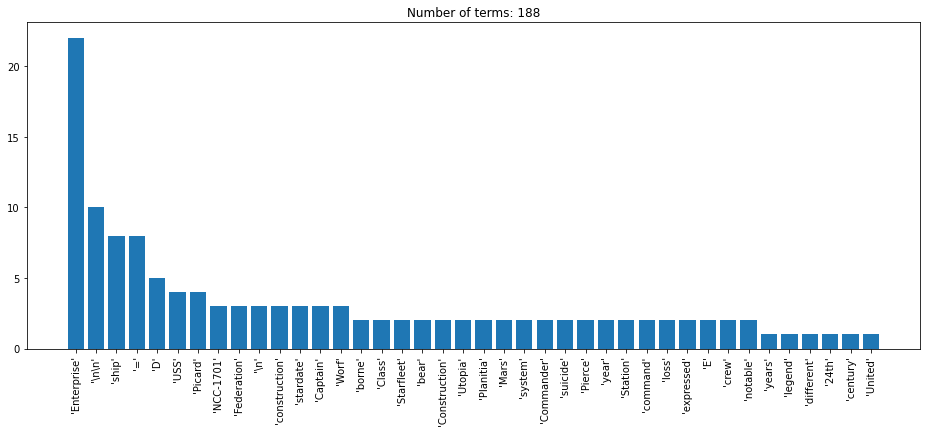

In [20]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)],40)

### Check Part of Speech

In [21]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : NOUN  NN
 7|')'          : PUNCT -RRB-
 8|'\n\n'       : SPACE _SP
 9|'"'          : PUNCT ''
10|'For'        : ADP   IN
11|'five'       : NUM   CD
12|'hundred'    : NUM   CD
13|'years'      : NOUN  NNS
14|','          : PUNCT ,
15|'every'      : DET   DT
16|'ship'       : NOUN  NN
17|'that'       : PRON  WDT
18|'has'        : AUX   VBZ
19|'borne'      : VERB  VBN
20|'the'        : DET   DT
21|'name'       : NOUN  NN
22|'of'         : ADP   IN
23|'the'        : DET   DT
24|'Enterprise' : NOUN  NN
25|'has'        : AUX   VBZ
26|'become'     : VERB  VBN
27|'a'          : DET   DT
28|'legend'     : NOUN  NN
29|'.'          : PUNCT .


### Lemmatisation

In [22]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'd'
 7| ')'          ')'
 8| '\n\n'       '\n\n'
 9| '"'          '"'
10| 'For'        'for'
11| 'five'       'five'
12| 'hundred'    'hundred'
13| 'years'      'year'
14| ','          ','
15| 'every'      'every'
16| 'ship'       'ship'
17| 'that'       'that'
18| 'has'        'have'
19| 'borne'      'bear'
20| 'the'        'the'
21| 'name'       'name'
22| 'of'         'of'
23| 'the'        'the'
24| 'Enterprise' 'enterprise'
25| 'has'        'have'
26| 'become'     'become'
27| 'a'          'a'
28| 'legend'     'legend'
29| '.'          '.'


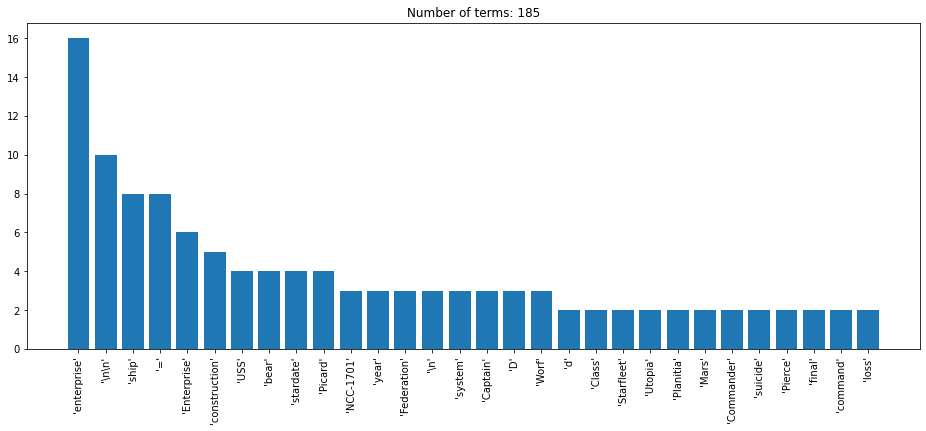

In [23]:
#'%r' is raw text
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [24]:
for s in doc.sents:
    print(s)

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
This one is no different."


The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
During her career, the Enterprise served as the Federation flagship.
The Enterprise was destroyed during the Battle of Veridian III in 2371.


==
History==
=
==
Construction and launch===

The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system.
The construction was a massive undertaking, involving thousands of people across disciplines.
Construction was supervised by Commander Orfil Quinteros.
Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design.
Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.


One of the ship's nacelle t

In [25]:
## spaCy
for i, s in enumerate(doc.sents): #for each spacy sentence
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents: #print out entity
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)"For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
ORG        : Enterprise
 1: This one is no different."
 2: The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
WORK_OF_ART: The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
GPE        : Starfleet
ORDINAL    : fifth
ORG        : Enterprise
 3: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
 4: The Enterprise was destroyed during the Battle of Veridian III in 2371.
----

## Extra: Using NLTK for NLP

In [26]:
# conda install -c anaconda nltk
import nltk

In a Python interpreter, execute the following commands:

- import nltk
- nltk.download()

At the NLTK Downloader GUI, install the following:

- averaged_perceptron_tagger
- ACE Named Entity Chunker (Maximum entropy)
- Punkt Tokenizer Models
- Stopwords Corpus
- WordNet
- Word Lists

### Tokenise

In [27]:
test=clean_text.lower()

In [58]:
# use nltk to find tokens
tokens = nltk.word_tokenize(clean_text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| 'NCC1701D'
 4| 'For'
 5| 'five'
 6| 'hundred'
 7| 'years'
 8| 'every'
 9| 'ship'
10| 'that'
11| 'has'
12| 'borne'
13| 'the'
14| 'name'
15| 'of'
16| 'the'
17| 'Enterprise'
18| 'has'
19| 'become'
20| 'a'
21| 'legend'
22| 'This'
23| 'one'
24| 'is'
25| 'no'


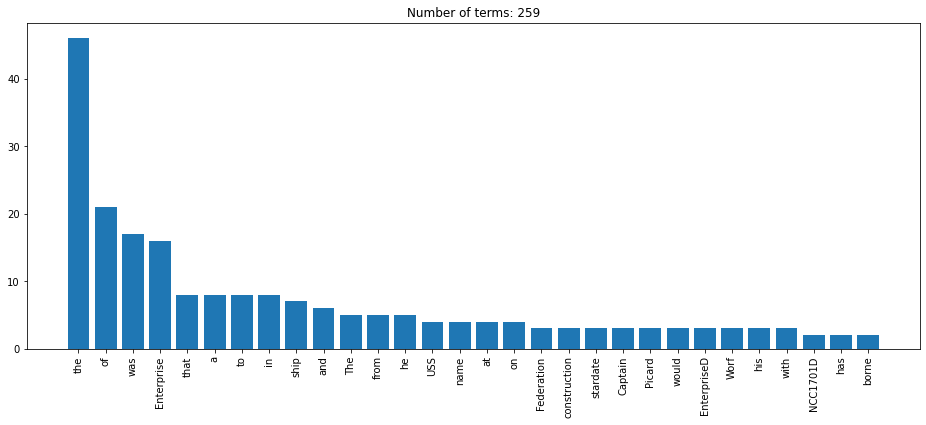

In [59]:
plot_words(tokens)

### Stop words

In [60]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [61]:
stopWords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [62]:
# ANSWER - create a list of tokens withOUT the stop words
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [t for t in tokens if t not in stopWords] # create a list of tokens withOUT the stop words 

#tokens_no_stop = [word for word in tokens if word not in stopWords]

#create for loop to filter out or list comprehension

In [63]:
tokens_no_stop

['USS',
 'Enterprise',
 'NCC1701D',
 'For',
 'five',
 'hundred',
 'years',
 'every',
 'ship',
 'borne',
 'name',
 'Enterprise',
 'become',
 'legend',
 'This',
 'one',
 'different',
 'The',
 'USS',
 'Enterprise',
 'NCC1701D',
 '24th',
 'century',
 'United',
 'Federation',
 'Planets',
 'Galaxy',
 'Class',
 'starship',
 'operated',
 'Starfleet',
 'fifth',
 'Federation',
 'ship',
 'bear',
 'name',
 'Enterprise',
 'During',
 'career',
 'Enterprise',
 'served',
 'Federation',
 'flagship',
 'The',
 'Enterprise',
 'destroyed',
 'Battle',
 'Veridian',
 'III',
 '2371',
 'History',
 'Construction',
 'launch',
 'The',
 'Enterprise',
 'built',
 'Utopia',
 'Planitia',
 'Fleet',
 'Yards',
 'orbiting',
 'Mars',
 'Solar',
 'system',
 'The',
 'construction',
 'massive',
 'undertaking',
 'involving',
 'thousands',
 'people',
 'across',
 'disciplines',
 'Construction',
 'supervised',
 'Commander',
 'Orfil',
 'Quinteros',
 'Dr',
 'Leah',
 'Brahms',
 'responsible',
 'much',
 'Enterprises',
 'warp',
 'propul

In [76]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    #if tokens[i-1] == '.':
     #   break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| 'NCC1701D'      'NCC1701D'
 4| 'For'           'For'
 5| 'five'          'five'
 6| 'hundred'       'hundred'
 7| 'years'         'years'
 8| 'every'         'every'
 9| 'ship'          'ship'
10| 'that'         
11| 'has'          
12| 'borne'         'borne'
13| 'the'          
14| 'name'          'name'
15| 'of'           
16| 'the'          
17| 'Enterprise'    'Enterprise'
18| 'has'          
19| 'become'        'become'
20| 'a'            
21| 'legend'        'legend'
22| 'This'          'This'
23| 'one'           'one'
24| 'is'           
25| 'no'           
26| 'different'     'different'
27| 'The'           'The'
28| 'USS'           'USS'
29| 'Enterprise'    'Enterprise'
30| 'NCC1701D'      'NCC1701D'
31| 'was'          
32| 'a'            
33| '24th'          '24th'
34| 'century'       'century'
35| 'United'        'United'
36| 'Federation'    'Federatio

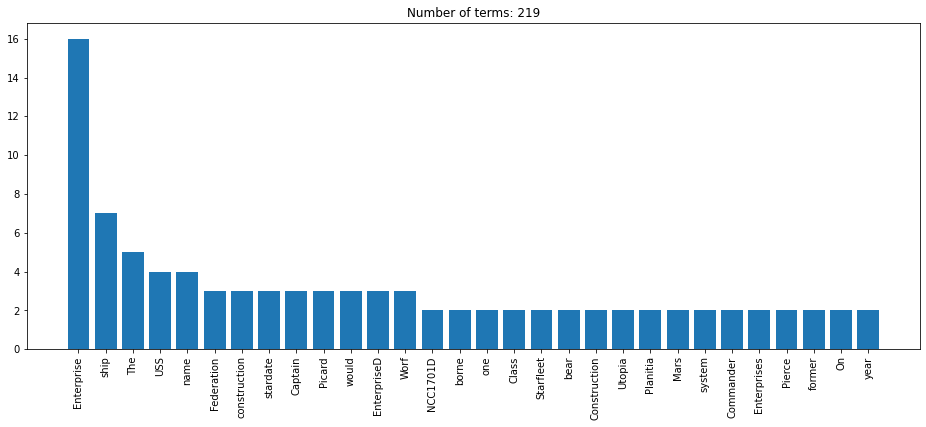

In [65]:
# ANSWER - Create plot of words without stopword
plot_words(tokens_no_stop)

### Check Part of Speech

In [66]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [77]:
tokens

['USS',
 'Enterprise',
 'NCC1701D',
 'For',
 'five',
 'hundred',
 'years',
 'every',
 'ship',
 'that',
 'has',
 'borne',
 'the',
 'name',
 'of',
 'the',
 'Enterprise',
 'has',
 'become',
 'a',
 'legend',
 'This',
 'one',
 'is',
 'no',
 'different',
 'The',
 'USS',
 'Enterprise',
 'NCC1701D',
 'was',
 'a',
 '24th',
 'century',
 'United',
 'Federation',
 'of',
 'Planets',
 'Galaxy',
 'Class',
 'starship',
 'operated',
 'by',
 'Starfleet',
 'and',
 'the',
 'fifth',
 'Federation',
 'ship',
 'to',
 'bear',
 'the',
 'name',
 'Enterprise',
 'During',
 'her',
 'career',
 'the',
 'Enterprise',
 'served',
 'as',
 'the',
 'Federation',
 'flagship',
 'The',
 'Enterprise',
 'was',
 'destroyed',
 'during',
 'the',
 'Battle',
 'of',
 'Veridian',
 'III',
 'in',
 '2371',
 'History',
 'Construction',
 'and',
 'launch',
 'The',
 'Enterprise',
 'was',
 'built',
 'at',
 'Utopia',
 'Planitia',
 'Fleet',
 'Yards',
 'orbiting',
 'Mars',
 'in',
 'the',
 'Solar',
 'system',
 'The',
 'construction',
 'was',
 'a'

In [78]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'NCC1701D'   : NNP  proper noun, singular "Harrison"
 4|'For'        : IN   preposition/subordinating conjunction
 5|'five'       : CD   cardinal digit
 6|'hundred'    : CD   cardinal digit
 7|'years'      : NNS  noun plural "desks"
 8|'every'      : DT   determiner
 9|'ship'       : NN   noun, singular "desk"
10|'that'       : WDT  wh-determiner which
11|'has'        : VBZ  verb, 3rd person sing. present takes
12|'borne'      : VBN  verb, past participle taken
13|'the'        : DT   determiner
14|'name'       : NN   noun, singular "desk"
15|'of'         : IN   preposition/subordinating conjunction
16|'the'        : DT   determiner
17|'Enterprise' : NNP  proper noun, singular "Harrison"
18|'has'        : VBZ  verb, 3rd person sing. present takes
19|'become'     : VBN  verb, past participle taken
20|'a'          : DT   determiner
21|'legend'     : RBR  adverb, comparative b

### Stemming

In [79]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])
# for every word in the split we stem the word then join back with a space

In [80]:
text.split("h") #split it at each h
# default is the whitespace

['USS Enterprise (NCC-1701-D)\n\n"For five ',
 'undred years, every s',
 'ip t',
 'at ',
 'as borne t',
 'e name of t',
 'e Enterprise ',
 'as become a legend. T',
 'is one is no different."\n\nT',
 'e USS Enterprise (NCC-1701-D) was a 24t',
 ' century United Federation of Planets Galaxy Class stars',
 'ip operated by Starfleet, and t',
 'e fift',
 ' Federation s',
 'ip to bear t',
 'e name Enterprise. During ',
 'er career, t',
 'e Enterprise served as t',
 'e Federation flags',
 'ip. T',
 'e Enterprise was destroyed during t',
 'e Battle of Veridian III in 2371.\n\n==History==\n===Construction and launc',
 '===\nT',
 'e Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in t',
 'e Solar system. T',
 'e construction was a massive undertaking, involving t',
 'ousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Lea',
 ' Bra',
 'ms was responsible for muc',
 ' of t',
 "e Enterprise's warp propulsion system design. Some of t",

In [81]:
stemmed

'uss enterpris (ncc-1701-d) "for five hundr years, everi ship that ha born the name of the enterpris ha becom a legend. thi one is no different." the uss enterpris (ncc-1701-d) wa a 24th centuri unit feder of planet galaxi class starship oper by starfleet, and the fifth feder ship to bear the name enterprise. dure her career, the enterpris serv as the feder flagship. the enterpris wa destroy dure the battl of veridian iii in 2371. ==history== ===construct and launch=== the enterpris wa built at utopia planitia fleet yard orbit mar in the solar system. the construct wa a massiv undertaking, involv thousand of peopl across disciplines. construct wa supervis by command orfil quinteros. dr. leah brahm wa respons for much of the enterprise\' warp propuls system design. some of the enterprise\' compon were deriv from technolog origin develop on the uss pegasus. one of the ship\' nacel tube wa the site of a multipl murder-suicid while she wa still under construct at utopia planitia. a member 

### Lemmatisation

In [82]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [83]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| '"for'         '"For'      
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


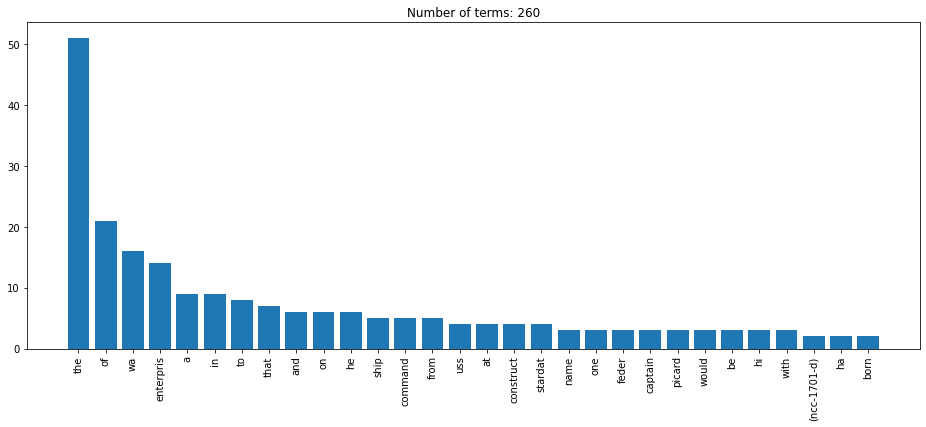

In [84]:
plot_words(stemmed.split())

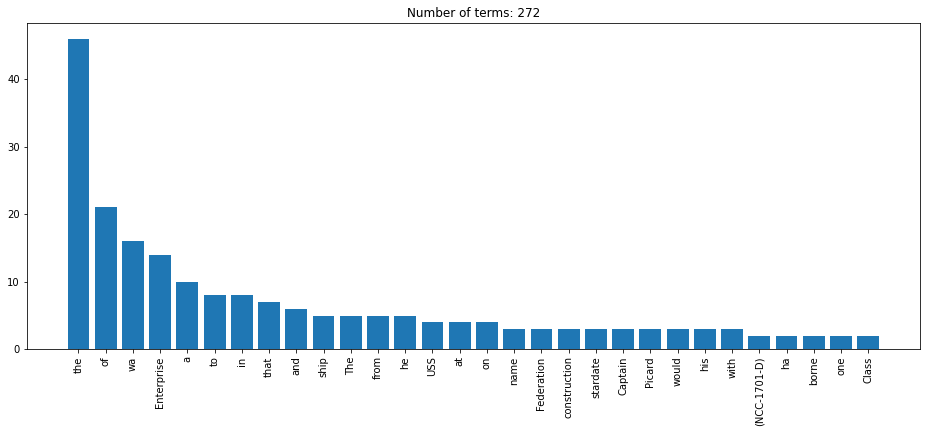

In [85]:
plot_words(lemma.split())

### Entity recognition

In [86]:
tagged

[('USS', 'NNP'),
 ('Enterprise', 'NNP'),
 ('NCC1701D', 'NNP'),
 ('For', 'IN'),
 ('five', 'CD'),
 ('hundred', 'CD'),
 ('years', 'NNS'),
 ('every', 'DT'),
 ('ship', 'NN'),
 ('that', 'WDT'),
 ('has', 'VBZ'),
 ('borne', 'VBN'),
 ('the', 'DT'),
 ('name', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Enterprise', 'NNP'),
 ('has', 'VBZ'),
 ('become', 'VBN'),
 ('a', 'DT'),
 ('legend', 'RBR'),
 ('This', 'DT'),
 ('one', 'CD'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('different', 'JJ'),
 ('The', 'DT'),
 ('USS', 'NNP'),
 ('Enterprise', 'NNP'),
 ('NCC1701D', 'NNP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('24th', 'JJ'),
 ('century', 'NN'),
 ('United', 'NNP'),
 ('Federation', 'NNP'),
 ('of', 'IN'),
 ('Planets', 'NNP'),
 ('Galaxy', 'NNP'),
 ('Class', 'NNP'),
 ('starship', 'NN'),
 ('operated', 'VBN'),
 ('by', 'IN'),
 ('Starfleet', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('fifth', 'JJ'),
 ('Federation', 'NNP'),
 ('ship', 'NN'),
 ('to', 'TO'),
 ('bear', 'VB'),
 ('the', 'DT'),
 ('name', 'NN'),
 ('Enterprise', 'NNP'),
 ('D

In [87]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)
#print(entities)
for e in entities:
    #print(e)
    s = re.sub(r'[\(\)]', '', str(e))
    #print(s)
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Enterprise
ORGANIZATION: Battle
GPE         : Veridian
ORGANIZATION: Enterprise
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprises
ORGANIZATION: USS
ORGANIZATION: Utopia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
FACILITY    : Earth Station
ORGANIZATION: McKinley Captain
ORGANIZATION: JeanLuc Picard
ORGANIZATION: Rear Admiral Norah Satie Legacy
PERSON      : Riker
ORGANIZATION: Enterprise
PERSON      : Picard
ORGANIZATION: EnterpriseD
ORGANIZATION: Enterprise
PERSON      : Deep Space
PERSON      : Starfleet Station
PERSON 